In [3]:
"""
Title - Cost of treatment
Aim - Our primary concern is to frigure out how 'cost of treatment' depends on patient's age,sex,bmi,smoking habits and region. 
"""

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
"Load the data"
insurance_data = pd.read_csv('./insurance.csv')

In [14]:
"Print the data"
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [17]:
#Observe null values
insurance_data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [18]:
#Count null values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
#Basic info of data
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
#Explore basic statistics value and information of data
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [21]:
"""
After having basic demonstration we can see that there are no null values in data features. 
Moreover, we have 3 categorical features smoker,region and sex which need to be converted into numerical values.
"""
from sklearn.preprocessing import LabelEncoder
#Remove duplicators
lbl_encoder = LabelEncoder()

label_encoded_insurance_data = insurance_data.copy()

"""
Clean categorical features by removing duplicates and fit values in label encoder. 
Also, set them into database for further processing
"""

#For gender
lbl_encoder.fit(label_encoded_insurance_data.sex.drop_duplicates())
label_encoded_insurance_data.sex = lbl_encoder.transform(label_encoded_insurance_data.sex)

#For smoker
lbl_encoder.fit(label_encoded_insurance_data.smoker.drop_duplicates())
label_encoded_insurance_data.smoker = lbl_encoder.transform(label_encoded_insurance_data.smoker)

#For region
lbl_encoder.fit(label_encoded_insurance_data.region.drop_duplicates())
label_encoded_insurance_data.region = lbl_encoder.transform(label_encoded_insurance_data.region)

#Upon completion let's verify our fit and transform process
label_encoded_insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [22]:
"""
As our goal is to figure out charges's dependency on data attributes we are gonna perform correlation based on 'charges' column.
"""
label_encoded_insurance_data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

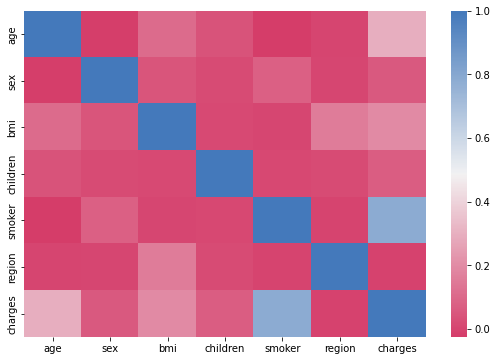

In [23]:
"""
Plot heatmap to observe correlation and find the attributes that affects the cost.
"""
pl.subplots(figsize=(9,6))
charges_correlation = label_encoded_insurance_data.corr()
sns.heatmap(charges_correlation,mask=np.zeros_like(charges_correlation,dtype=np.bool),cmap=sns.diverging_palette(h_neg=0,h_pos=250,as_cmap=True))

Text(0.5, 1.0, 'Distribution of charges')

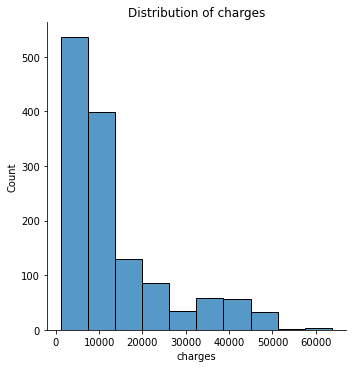

In [24]:
"""
As it can be demonstrated in the previous step, there is strong correlation with smoking attribute of the dataset. So, let's explore smoking in more details.
We are gonna use distribution plot to find out average of how much people are spending on treatment.
"""
sns.displot(label_encoded_insurance_data,x="charges",bins=10)
pl.title('Distribution of charges')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

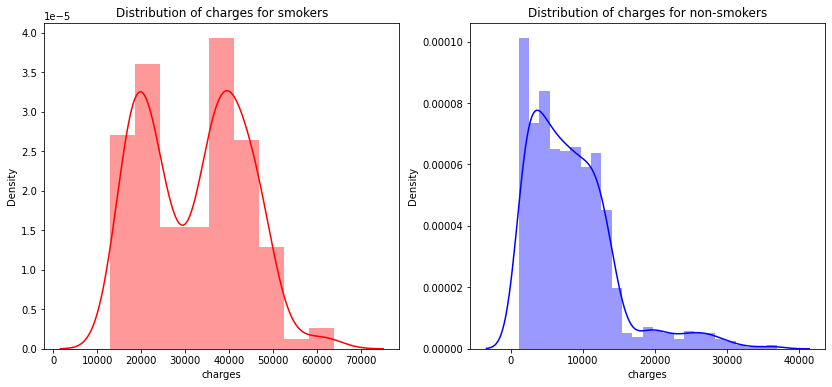

In [25]:
"""
Visualization distribution of charges for smokers
"""
distribution_figures = pl.figure(figsize=(14,6))

#For smokers
distribution_figures.add_subplot(121)
sns.distplot(label_encoded_insurance_data[(label_encoded_insurance_data.smoker == 1)]["charges"],color='r',kde=True)
pl.title('Distribution of charges for smokers')

#For non-smokers
distribution_figures.add_subplot(122)
sns.distplot(label_encoded_insurance_data[(label_encoded_insurance_data.smoker == 0)]["charges"],color='b',kde=True)
pl.title('Distribution of charges for non-smokers')

Text(0.5, 1.0, 'Categorization of smokers and non-smokers based on gender.')

<Figure size 1008x432 with 0 Axes>

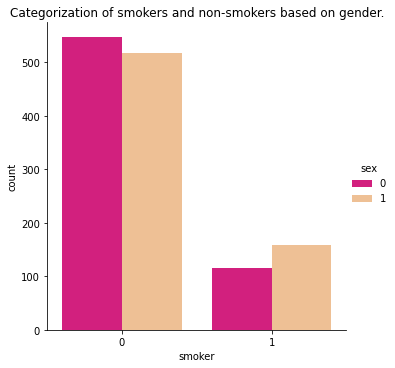

In [26]:
"""
It is obvious to depict from the above plots that smokers spend more money than non-smokers. 
However, numer of non-smoking patients seems to be greater. Let's confirm it.
"""
pl.figure(figsize=(14,6))
sns.catplot(x='smoker',kind='count',hue='sex',palette='Accent_r',data=label_encoded_insurance_data)
pl.title('Categorization of smokers and non-smokers based on gender.')


<Figure size 1008x432 with 0 Axes>

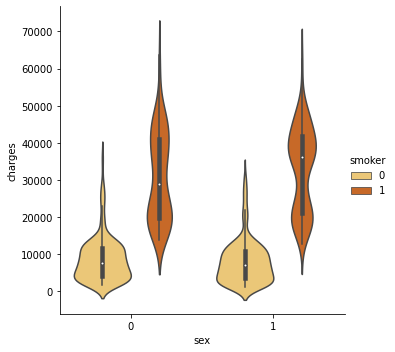

In [27]:
"""
Women are encoded with symbol "0" and men are encoded with symbol "1".
Smokers are encoded with symbol "1" and non-smokers are encoded with symbol "0".

From above chart, It is noticeable that our dataset has more male smokers than female smokers.
Given the factor pf smoking, we can assume that cost of treatment in men will be more than women. 

Let's do some more useful visualization bases on previous assumption.

"""
pl.figure(figsize=(14,6))
sns.catplot(x='sex',y='charges',kind='violin',hue='smoker',palette='YlOrBr',data=label_encoded_insurance_data)

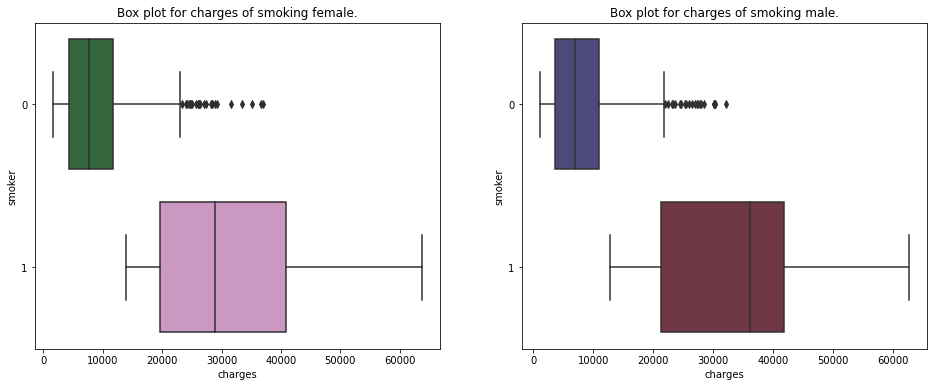

In [28]:
"""
Also violin category plot has the similar visualization to our last assumption and previous category plot. 
As smokers have great contribution to medical cost and charges, 
we are going to visualize and observe the difference in cost between men and women pay.
"""

boxplot_gender_figures = pl.figure(figsize=(16,6))

boxplot_gender_figures.add_subplot(121)
pl.title("Box plot for charges of smoking female.")
sns.boxplot(y="smoker",x="charges",data=label_encoded_insurance_data[(label_encoded_insurance_data.sex == 0)],orient="h",palette="cubehelix")

boxplot_gender_figures.add_subplot(122)
pl.title("Box plot for charges of smoking male.")
sns.boxplot(y="smoker",x="charges",data=label_encoded_insurance_data[(label_encoded_insurance_data.sex == 1)],orient="h",palette="icefire")



Text(0.5, 1.0, 'Distribution of charges across age.')

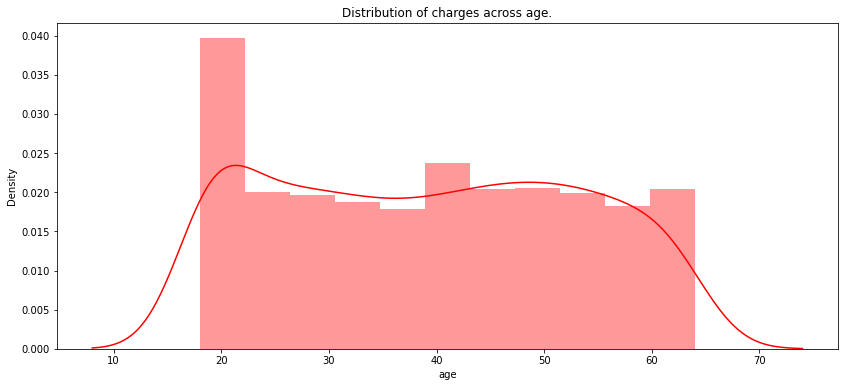

In [29]:
"""
Now pay attention to age. How cost is distributed with respect to patient's ages. 
"""
pl.figure(figsize=(14,6))
sns.distplot(label_encoded_insurance_data['age'],color='r')
pl.title("Distribution of charges across age.")

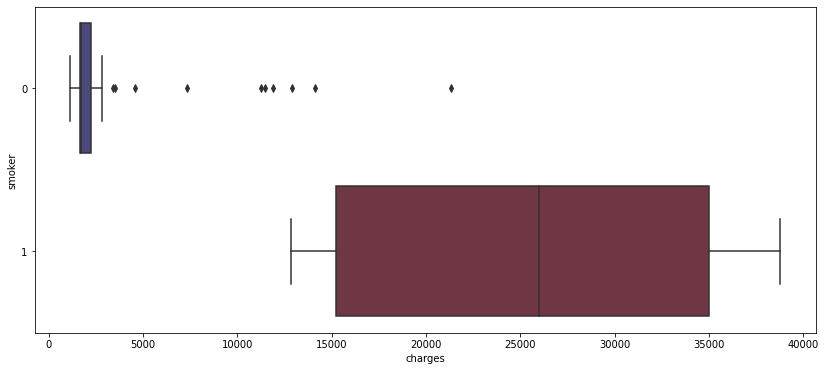

In [30]:
"""
After visualization and observation we can say that all across the patients age ranges between 18 and 64. 
One more thing, we have quite big distribution of cost at age 18. Let's figure out if smoking affects at this age.  
"""

pl.figure(figsize=(14,6))
sns.boxplot(y="smoker",x="charges",data=label_encoded_insurance_data[(label_encoded_insurance_data.age == 18)],orient="h",palette="icefire")

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers.')

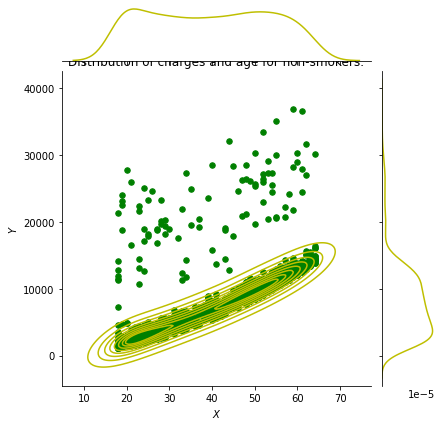

In [31]:
"""
From previous observation we see an interesting result, at the young age of 18 smokers spend a lot more than non-smokers. 
For non-smokers we are seeing a little tail upto 22,000 which can be due to diseas or accident.
Now let's see how cost of treatment depends on the age of smokers and non-smokers.
"""

ages_cost_dst = sns.jointplot(x="age",y="charges",data=label_encoded_insurance_data[(label_encoded_insurance_data.smoker==0)],kind="kde",color="y")
ages_cost_dst.plot_joint(pl.scatter, c="g", s=30)
ages_cost_dst.ax_joint.collections[0].set_alpha(0)
ages_cost_dst.set_axis_labels("$X$", "$Y$")
pl.title("Distribution of charges and age for non-smokers.")


Text(0.5, 1.0, 'Distribution of charges and age for smokers.')

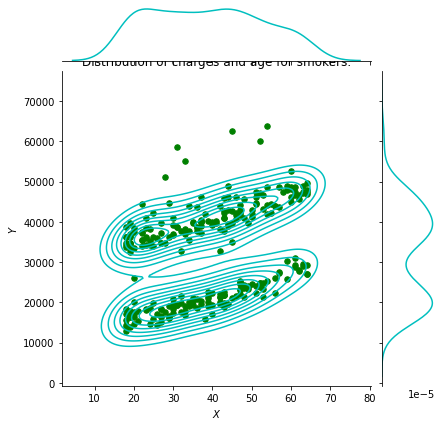

In [32]:
"""
We can examine from the previous chart that cost of treatment increases with age for non-smokers.
"""

g = sns.jointplot(x="age",y="charges", data=label_encoded_insurance_data[(label_encoded_insurance_data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="g", s=30)
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$","$Y$")
pl.title("Distribution of charges and age for smokers.")

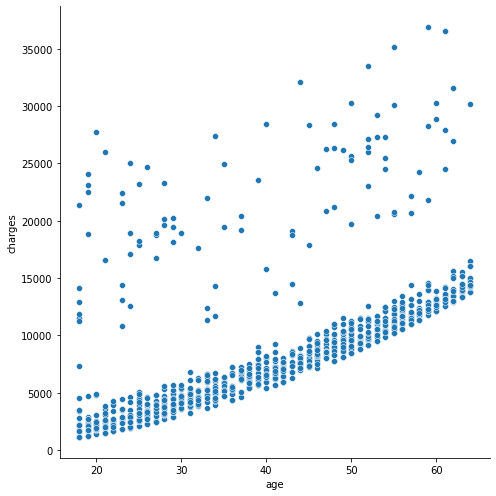

In [33]:
"""
Compared to non-smokers in smokers we do not see dependence of age and cost. 
Non-smokers scatter plot
"""
sns.relplot(x=label_encoded_insurance_data[(label_encoded_insurance_data.smoker == 0)].age,
            y=label_encoded_insurance_data[(label_encoded_insurance_data.smoker == 0)].charges,
            palette="tab10",
            height=7, data=label_encoded_insurance_data)

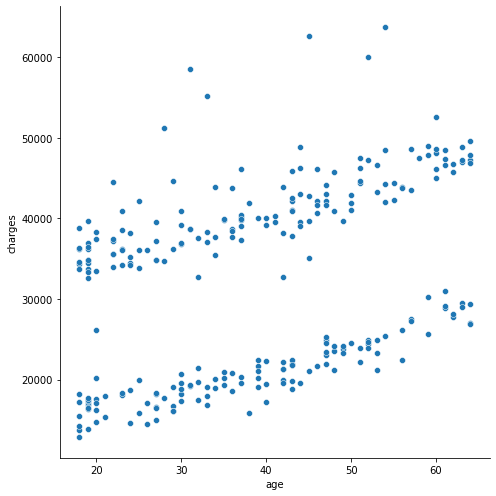

In [34]:
"""
Compared to non-smokers in smokers we do not see dependence of age and cost. 
Smokers scatter plot
"""
sns.relplot(x=label_encoded_insurance_data[(label_encoded_insurance_data.smoker == 1)].age,
            y=label_encoded_insurance_data[(label_encoded_insurance_data.smoker == 1)].charges,
            palette="tab10",
            height=7, data=label_encoded_insurance_data)

Text(0.5, 1.0, 'Distribution of charges for smokers and non-smokers across all ages.')

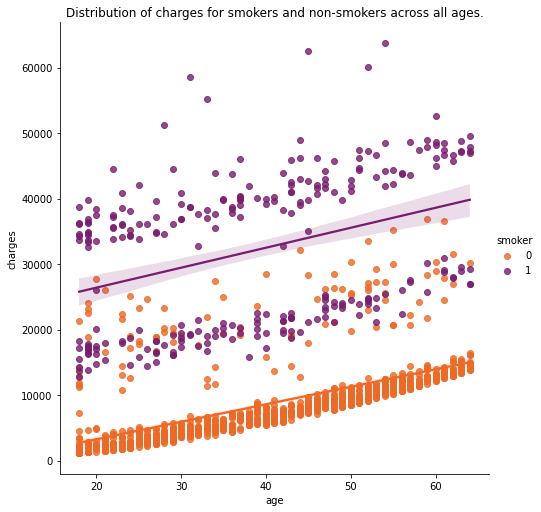

In [35]:
"""
Let's fit regression model for smokers and non-smokers both for charges distribution.
"""
sns.lmplot(x='age',y='charges',hue='smoker',data=label_encoded_insurance_data,palette='inferno_r',size=7)
pl.title("Distribution of charges for smokers and non-smokers across all ages.")

Text(0.5, 1.0, 'Distribution of bmi')

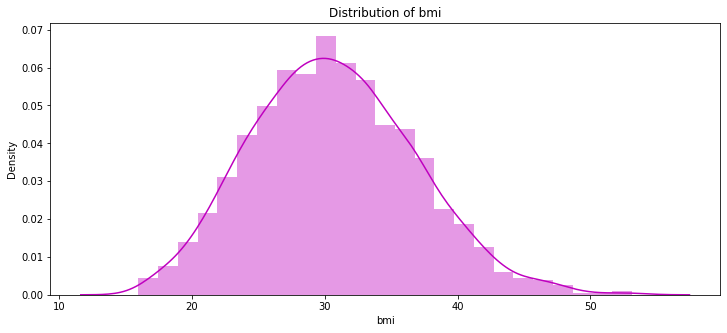

In [36]:
"""
Previous chart makes it clear that in case of non-smokers cost of tratement increases with age. 
On the other hand, there is no such dependency for smoking people. 
So, smoking is not the factor that affects cost of treatment. 
However, it would be logical to consider smoking contributes to increment of cost. Let's pay atention on bmi now. 
"""
pl.figure(figsize=(12,5))
sns.distplot(label_encoded_insurance_data["bmi"], color = 'm')
pl.title("Distribution of bmi")

Text(0.5, 1.0, 'Distribution of bmi for patients with bmi less than 30')

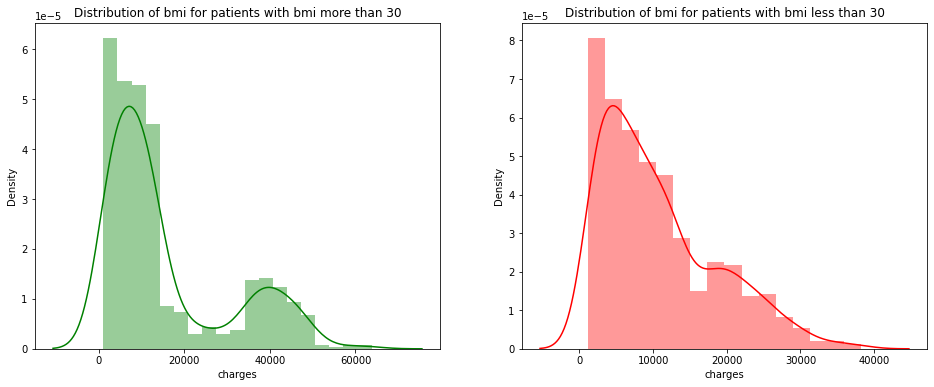

In [37]:
"""
The last chart makes it clear that there is something insanely interesting about bmi distribution. 
The average bmi in patients is 30 which means we have large number of patients who are almost near to obese range. 
With a value equal to 30 starts obesity. 

Let's have a look at distribution of cost for patients with bmi less than 30 and more than 30.
"""
bmi_dist = pl.figure(figsize=(16,6))



"""
Distribution of cost for patients with bmi less than 30 and more than 30.
"""
bmi_dist.add_subplot(121)
sns.distplot(label_encoded_insurance_data[(label_encoded_insurance_data.bmi>=30)]['charges'], color = 'g')
pl.title('Distribution of bmi for patients with bmi more than 30')


bmi_dist.add_subplot(122)
sns.distplot(label_encoded_insurance_data[(label_encoded_insurance_data.bmi<30)]['charges'], color = 'r')
pl.title('Distribution of bmi for patients with bmi less than 30')

Text(0.5, 1.0, 'Distribution of bmi and charges')

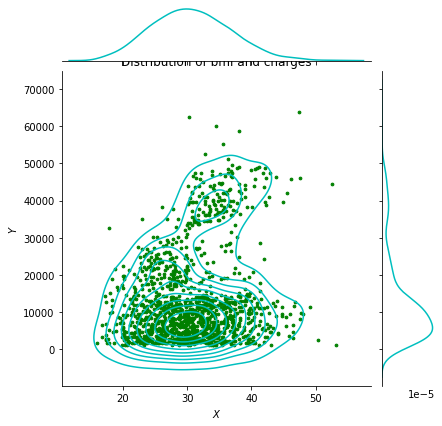

In [38]:
"""
From last 2 plots it is quite obvious that people with bmi greater than 30 spend more money towards treatment. 
Let's have a look at joint plot of distribution for charges and bmi.
"""

bmi_charges_dist = sns.jointplot(x="bmi",y="charges", data=label_encoded_insurance_data,kind="kde", color="c")
bmi_charges_dist.plot_joint(pl.scatter, c="g", s=30, linewidth=1, marker=".")
bmi_charges_dist.set_axis_labels("$X$", "$Y$")
pl.title('Distribution of bmi and charges')

Text(0.5, 1.0, 'Scatterplot of of bmi and charges by smoking preference of individual.')

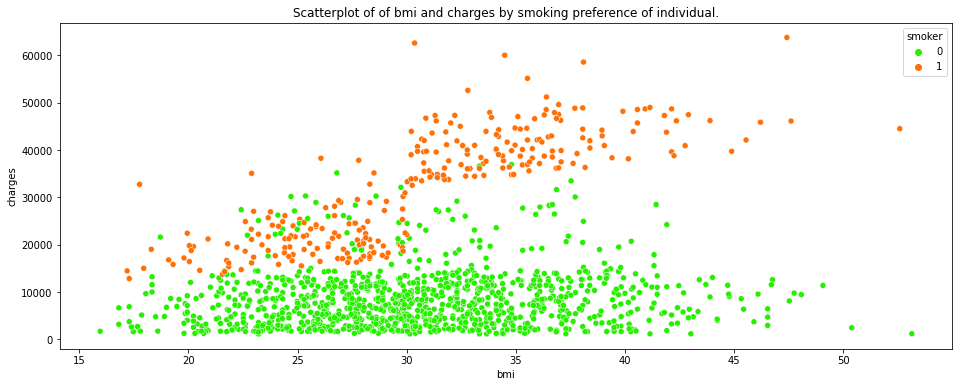

In [39]:
"""
From the last plot it is obvious that cost of treatment increases with bmi greater than 30. 
Let's get into more details by visualising scatter plot for relationship between bmi and cost of treatent for smoking preferences.
"""

pl.figure(figsize=(16,6))
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=label_encoded_insurance_data,palette='gist_ncar')
pl.title('Scatterplot of of bmi and charges by smoking preference of individual.')

Text(0.5, 1.0, 'Linear relationship of bmi and charges by smoking preference of individual.')

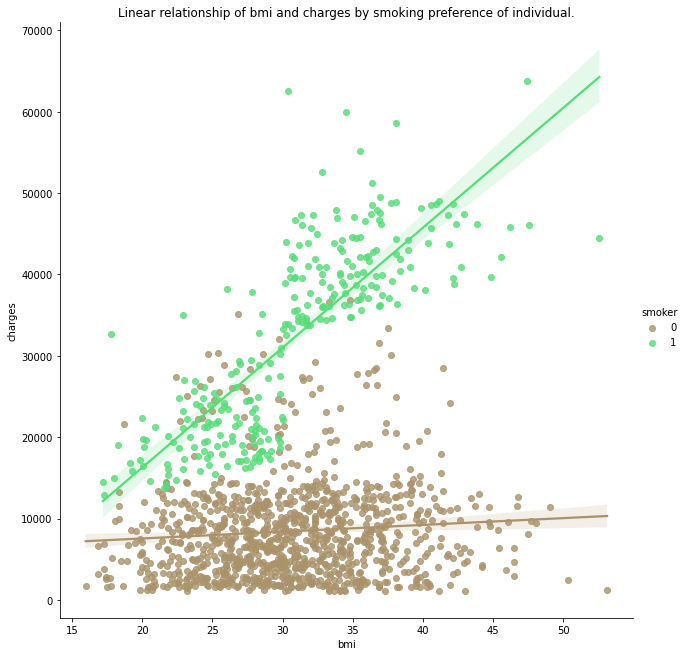

In [40]:
"""
Now let's look deeply for relationship between bmi and cost of treatment in terms of smoking preference.
"""
sns.lmplot(x='bmi',y='charges',hue='smoker',data=label_encoded_insurance_data,palette='terrain_r',size=9)
pl.title('Linear relationship of bmi and charges by smoking preference of individual.')

Text(0.5, 1.0, "Count of patients who's got children.")

<Figure size 1152x432 with 0 Axes>

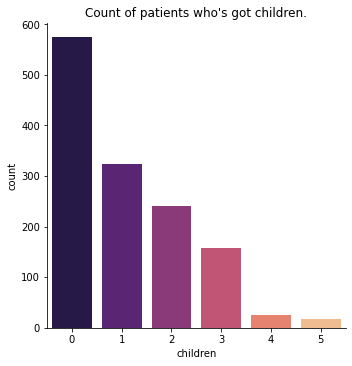

In [41]:
"""
Isn't obvious from the relationship in previous chart that for smokers cost of treatment increases insanely than for non-smokers. 
On the contrary scenario we do not see such relationship for non-smokers. 
For patients who do not smoke cost of treatment do not increases insanely but moderately and little. 
So, there is no dependency in case of non-smokers.     

Let's consider another factor and pay attention to count of children our patients have.
"""

pl.figure(figsize=(16,6))
sns.catplot(x='children',kind='count',data=label_encoded_insurance_data,palette='magma')
pl.title('Count of patients who\'s got children.')

Text(0.5, 1.0, 'Patients with children and with smoking preference.')

<Figure size 1152x432 with 0 Axes>

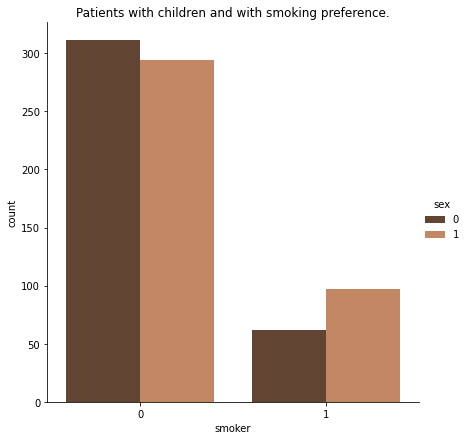

In [42]:
"""
Previous chart specifies that majority of our patients do not have any children.
However, some of our patients have 4 or 5 children. Let's find out people who smoke have children.
"""

pl.figure(figsize=(16,6))
sns.catplot(x='smoker',kind='count',palette='copper',hue='sex',data=label_encoded_insurance_data[(label_encoded_insurance_data.children>0)],size=6)
pl.title('Patients with children and with smoking preference.')

In [48]:
"""
From our last observation we can say that gladly non-smokers have more children than smokers. Also, we have more male smokers than the female smokers.

In conlusion, we have following clarifications from our data exploration and visualsation that affect cost of treatment.
1. We have more male smokers than female smokers.
2. For non-smokers cost of tratement increases with age.
3. In terms of smokers cost of treatment increases insanely with bmi 
4. We have large number of non-smoking parents.
 Considering above facts let's perform regression.
"""

from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

feature_data = label_encoded_insurance_data.drop(['charges'],axis=1)
target_data = label_encoded_insurance_data.charges

x_train, x_test, y_train, y_test = train_test_split(feature_data,target_data,random_state=0)
insurance_data_linearRegression = LinearRegression().fit(x_train,y_train) 

y_train_pred = insurance_data_linearRegression.predict(x_train)
y_test_pred = insurance_data_linearRegression.predict(x_test)

insurance_data_linearRegression.score(x_test,y_test)

0.7962732059725786

In [58]:
"""
After observing our model accuracy I realized that it needs to be improved. The current score is pretty weak and low.
It is because of lack of pre-processing which is going be implemented afterwards. 
Let's focus on polynomial features with aim to improve accuracy and score of our model.
"""

featured_data_polynomial = label_encoded_insurance_data.drop(['charges','region'],axis=1)
"""
Reason to drop region column is that we do not have any data attribute that would depend on region. 
Also, it would be logical and reasonable to consider that region does not affect cost of treatment in terms of our dataset.
"""
target_data_polynomial = label_encoded_insurance_data.charges

#Set up polynomial features then perform fit and transform
polynomial_features = PolynomialFeatures(degree = 2)
featured_data_polFeatures = polynomial_features.fit_transform(featured_data_polynomial)

X_train,X_test,Y_train,Y_test = train_test_split(featured_data_polFeatures,target_data_polynomial,random_state = 0)

#Polynomial Regression
polynomialRegression = LinearRegression().fit(X_train,Y_train)

#Prediction variables
Y_train_pred = polynomialRegression.predict(X_train)
Y_test_pred = polynomialRegression.predict(X_test)

#Model accuracy
print(polynomialRegression.score(X_test,Y_test))

0.8849197344147227


In [59]:
"""
After applying polynomial features and regression our model predicts well.
"""
random_forest_regression = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)

random_forest_regression.fit(x_train,y_train)
forest_train_pred = random_forest_regression.predict(x_train)
forest_test_pred = random_forest_regression.predict(x_test)

print('Mean Squared Error of train data: %.3f, Mean Squared Error of test data: %.3f' 
      % (mean_squared_error(y_train,forest_train_pred),
        mean_squared_error(y_test,forest_test_pred))
      )
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))


MSE train data: 3746684.434, MSE test data: 19965476.411
R2 train data: 0.974, R2 test data: 0.873


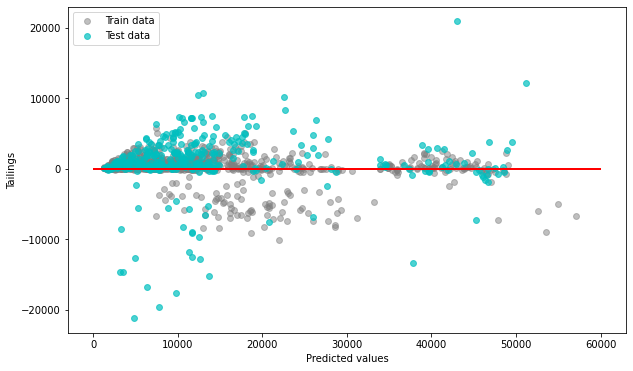

In [62]:
pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred-y_train,c='gray',marker='o',s=35,alpha=0.5,label='Train data')
pl.scatter(forest_test_pred,forest_test_pred-y_test,c='c',marker='o',s=35,alpha=0.7,label='Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()
"""
In below chart there's a surprising retraining of our algorithm on our dataset. 
Also, below chart clarifies that our model predicts well for real-time data. 
"""